In [1]:
from sklearn import datasets
import pandas as pd

%matplotlib inline

# Build a model

In [2]:


ds = datasets.load_breast_cancer();
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state = 1960)
NC = 12

X = ds.data[:,0:NC]
y = ds.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1960)

clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1960,
            splitter='best')

# Decision Tree Plot

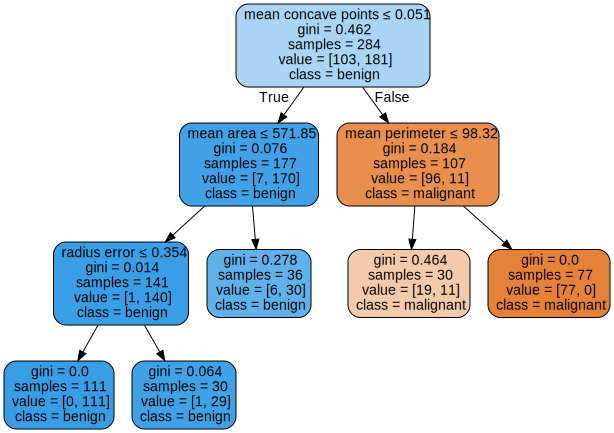

In [3]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=ds.feature_names[0:NC],  
                         class_names=ds.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


# sklearn_explain approach

In [4]:
# Explain the score = ln(p(1) / (1 - p(1)))


import sklearn_explain.explainer as expl
lExplainer = expl.cModelScoreExplainer(clf)
lExplainer.mSettings.mFeatureNames = ds.feature_names[0:NC]
lExplainer.mSettings.mExplanationOrder = 1
    
lExplainer.fit(X_train)
df_rc = lExplainer.explain(X_test)

print(df_rc.columns)


USING_LOG_ODDS_AS_SCORE
SCORE_QUANTILES {0: -inf, 1: -11.512915464920228, 2: 1.6094379124341005, 3: 3.3672958299864741, 4: 11.512915464924779}
CONST_SCORE_DETECTIOM -11.5129154649 11.5129154649 False
NON_USED_FEATURES ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'texture error']
USED_FEATURES ['mean perimeter', 'mean area', 'mean concave points', 'radius error']
FEATURE_QUANTILES mean perimeter {0: -inf, 1: 71.884, 2: 80.623999999999995, 3: 90.566000000000003, 4: 111.44}
FEATURE_QUANTILES mean area {0: -inf, 1: 387.10000000000002, 2: 477.30000000000001, 3: 602.0, 4: 922.44000000000005}
FEATURE_QUANTILES mean concave points {0: -inf, 1: 0.017368000000000001, 2: 0.027373999999999999, 3: 0.047373999999999965, 4: 0.084198000000000009}
FEATURE_QUANTILES radius error {0: -inf, 1: 0.21351999999999999, 2: 0.26870000000000005, 3: 0.36443999999999999, 4: 0.55352000000000001}
Index(['mean radius', 'mean texture

In [5]:
df_rc_2 = lExplainer.explain(X_test[0].reshape(1, -1))

In [6]:
X_test[0].reshape(1, -1)

array([[  1.17600000e+01,   2.16000000e+01,   7.47200000e+01,
          4.27900000e+02,   8.63700000e-02,   4.96600000e-02,
          1.65700000e-02,   1.11500000e-02,   1.49500000e-01,
          5.88800000e-02,   4.06200000e-01,   1.21000000e+00]])

In [7]:
df_rc_2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,reason_3,reason_4,reason_1_idx,detailed_reason_1,reason_2_idx,detailed_reason_2,reason_3_idx,detailed_reason_3,reason_4_idx,detailed_reason_4
0,11.76,21.6,1,1,0.08637,0.04966,0.01657,0,0.1495,0.05888,...,mean area,mean perimeter,2,[(-inf < 'mean concave points' <= 0.017368)],3,[(0.36444 < 'radius error' <= 0.55352)],1,[(387.1 < 'mean area' <= 477.3)],0,[(71.884 < 'mean perimeter' <= 80.624)]


In [8]:
df_rc_2[[col for col in df_rc_2.columns if col.startswith('detailed')]]

,detailed_reason_1,detailed_reason_2,detailed_reason_3,detailed_reason_4
0,[(-inf < 'mean concave points' <= 0.017368)],[(0.36444 < 'radius error' <= 0.55352)],[(387.1 < 'mean area' <= 477.3)],[(71.884 < 'mean perimeter' <= 80.624)]


# Scord Card

In [11]:
scorecard_df = lExplainer.get_local_score_card(X_test[0].reshape(1, -1))


GET_LOCAL_SCORE_CARD [[  1.17600000e+01   2.16000000e+01   7.47200000e+01   4.27900000e+02
    8.63700000e-02   4.96600000e-02   1.65700000e-02   1.11500000e-02
    1.49500000e-01   5.88800000e-02   4.06200000e-01   1.21000000e+00]] [ 3.36729583]


In [12]:
scorecard_df.head(scorecard_df.shape[0])


,feature_1,feature_min_1,feature_max_1,points
0,mean perimeter,-inf,71.884000,1.682561
1,mean perimeter,71.884000,80.624000,1.682561
2,mean perimeter,80.624000,90.566000,1.682561
3,mean perimeter,90.566000,111.440000,-0.079875
4,mean perimeter,111.440000,inf,-1.682561
5,mean area,-inf,387.100000,1.682561
6,mean area,387.100000,477.300000,1.682561
7,mean area,477.300000,602.000000,1.682561
8,mean area,602.000000,922.440000,-0.079875
9,mean area,922.440000,inf,-1.682561


In [13]:
scorecard_df.columns

Index(['feature_1', 'feature_min_1', 'feature_max_1', 'points'], dtype='object')